Notebook 0.1 pca et sélection des variables

Objectif:

    - À l'aide de la Principal Class Analysis, sélectionner les variables qui seront utilisées dans le clustering

Pour l'instant, les variables sélectionnées sont un mixte de SES et de lifestyle, juste sélectionner lifestyle??? 

Entrée:

    - Données du pilote = pilote-1-quebec-prov-2022.csv

Sortie:

    - Graphs PCA qui servent à la prise de décision pour le choix des variables
    - data_filtered = données filtrées selon variables à utiliser pour le clustering 

In [1]:
# Packages ---------------------------------------------------------------
library(dplyr)
library(ggplot2)
library(cluster)
library(factoextra)
library(tidyr)
library(ggcorrplot)
library(tibble)
library(gridExtra)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [1]:
# Data -------------------------------------------------------------------

df_pilot1_2022 <- read.csv("/home/alexab/Dropbox/Ulaval/CLESSN/_SharedFolder_datagotchi-developpement/quebec_prov_2022/pilotes/pilote-1-quebec-prov-2022.csv")


In [2]:

variables_int <- c(
  # "id",
  # "postal_code",
  # "ses_age",
   "male",
   "female",
   "ses_genderOther",
   "age34m",
   "age3554",
   "age55p",
   "langEn",
   "langFr",
   "ses_languageOther",
   "act_Gym",
   "act_TeamSport",
  # "act_Walk",
   "act_Run",
   "act_Yoga",
  # "act_Swimming",
  # "act_Other",
   "act_None",
  # "answers.sport",
   "act_Fishing",
   "act_Hunting",
   "act_VisitsMuseumsGaleries",
   "act_MotorizedOutdoorActivities",
   "act_Volunteering",
   "animal_cat",
   "animal_dog",
  # "animal_domestic",
  # "animal_farm",
  # "animal_noPet",
  # "answers.pets",
   "cons_brand_MaR",
  # "cons_brand_BInd",
  # "cons_brand_ChainesB",
  # "cons_brand_GSurf",
  # "cons_brand_OnlineOnly",
   "cons_brand_Frip",
  # "cons_brand_Other",
  # "answers.shopping",
   "educBHS",
   "educCollege",
   "educUniv",
   "cons_redWineDrink",
  # "cons_whiteWineDrink",
  # "cons_roseDrink",
  # "cons_sparklingDrink",
   "cons_regBeers",
  # "cons_microBeers",
  # "cons_spiritDrink",
   "cons_cocktailsDrink",
   "cons_noDrink",
  # "answers.alcohol",
  # "ses_income_None",
  # "ses_income_i1to30",
  # "ses_income_i31to60",
  # "ses_income_i61to90",
  # "ses_income_i91to110",
  # "ses_income_i111to150",
  # "ses_income_i151to200",
  # "ses_income_i201toInf",
  # "ses_income_no_answer",
   "incomeLow",
   "incomeMid",
   "incomeHigh",
  # "parent_outside",
  # "parent_canada",
  # "parent_no_answer",
   "ses_dwelling_app",
  # "ses_dwelling_loft",
  # "ses_dwelling_condo",
  # "ses_dwelling_tour",
   "ses_dwelling_detachedHouse",
  # "ses_dwelling_townHouse",
  # "ses_dwelling_semiDetached",
  # "ses_dwelling_coop",
  # "ses_dwelling_HLM",
  # "ses_dwelling_mobile",
  # "ses_dwelling_other",
  # "answers.dwelling",
  # "cons_Smoke_never",
  # "cons_Smoke_few_times_year",
  # "cons_Smoke_month",
  # "cons_Smoke_once_week",
  # "cons_Smoke_few_times_week",
  # "cons_Smoke_once_day",
  # "cons_Smoke_few_times_day",
  # "answers.smoke",
   "act_transport_Car",
  # "act_transport_SUV",
  # "act_transport_Moto",
   "act_transport_Walk",
  # "act_transport_Bicycle",
   "act_transport_PublicTransportation",
  # "act_transport",
  # "answers.transport",
  # "vehicule_4x4",
  # "vehicule_Berline",
  # "vehicule_Cabriolet",
   "vehicule_PickUp",
  # "vehicule_Van",
  # "vehicule_luxury",
  # "vehicule_sport",
  # "vehicule_electric",
  # "vehicule_VUS",
  # "vehicule_other",
   "vehicule_noCar",
  # "act_modelCar",
  # "answers.vehicule",
  # "turnout_odds",
  # "op_intent",
  # "op_intent_CAQ",
  # "op_intent_PQ",
  # "op_intent_PLQ",
  # "op_intent_QS",
  # "op_intent_PCQ",
  # "op_intent_Other",
  # "op_intent_dontKnow",
  # "op_intent_wontVote",
  # "op_potentialG_CAQ",
  # "op_potentialG_PLQ",
  # "op_potentialG_PQ",
  # "op_potentialG_QS",
  # "op_potentialG_PCQ",
  # "op_voted_2018",
  # "party_id_caquiste",
  # "party_id_lib",
  # "party_id_pequiste",
  # "party_id_solidaire",
  # "party_id_cons",
  # "party_id_vert",
  # "party_id_another",
  # "party_id_none",
  # "party_id_DK",
   "immigrant",
   "cons_coffee_TimH",
   "cons_coffee_Starbucks",
  # "cons_coffee_SC",
  # "cons_coffee_McDo",
  # "cons_coffee_Other",
  # "cons_coffee_place_ind",
   "cons_coffee_place_noCoffee",
  # "answers.coffee_shop",
  # "app_swag_Formel",
  # "app_swag_Classique",
  # "app_swag_Casual",
  # "app_swag_Sport",
  # "app_swag_Chic",
  # "app_swag_HippBoheme",
  # "app_swag_Punk",
  # "app_swag_Rock",
  # "app_swag_Other",
  # "answers.clothing",
   "app_noTattoo",
  # "cons_meat_never",
  # "cons_meat_almost_never",
  # "cons_meat_once_month",
  # "cons_meat_once_week",
  # "cons_meat_few_week",
  # "cons_meat_daily",
  # "cons_meat_few_daily",
  # "answers.food",
   "cons_low_Meat",
   "cons_mid_Meat",
   "cons_much_Meat",
   "ses_ethn_White",
   "ses_ethn_Black",
  # "ses_ethn_Aboriginals",
   "ses_ethn_Asiatique",
  # "ses_ethn_Hispanique",
  # "ses_ethn_Arabe",
  # "ses_ethn_Other",
   "ses_hetero",
   "ses_gai",
   "ses_bisex"#,
  # "ses_sexOri_other"#,
 )


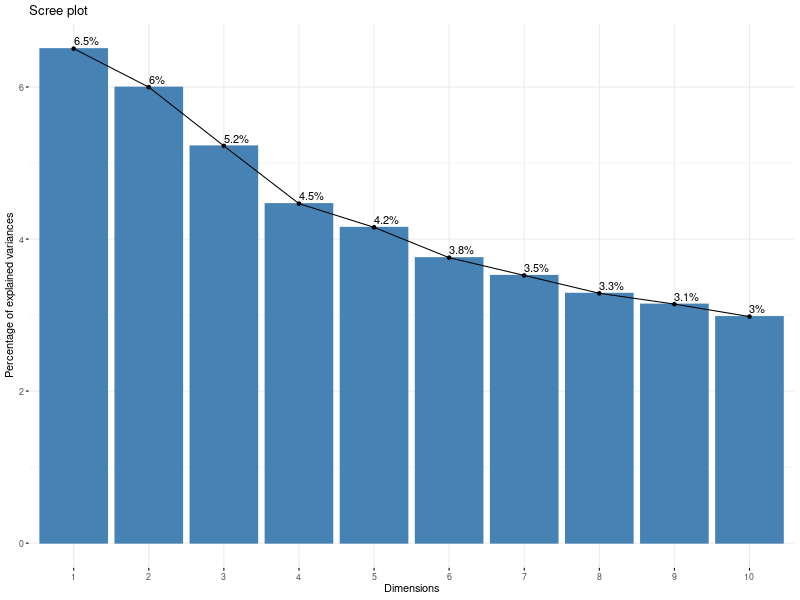

In [4]:

# Préparer les données
data_filtered <- df_pilot1_2022 %>%
  select(all_of(variables_int)) %>%
  drop_na()

# PCA
pca_all <- prcomp(
  data_filtered,
  scale = TRUE
)

# Viz 
pca_all$rotation[,1:4]

fviz_eig(pca_all, addlabels = TRUE)


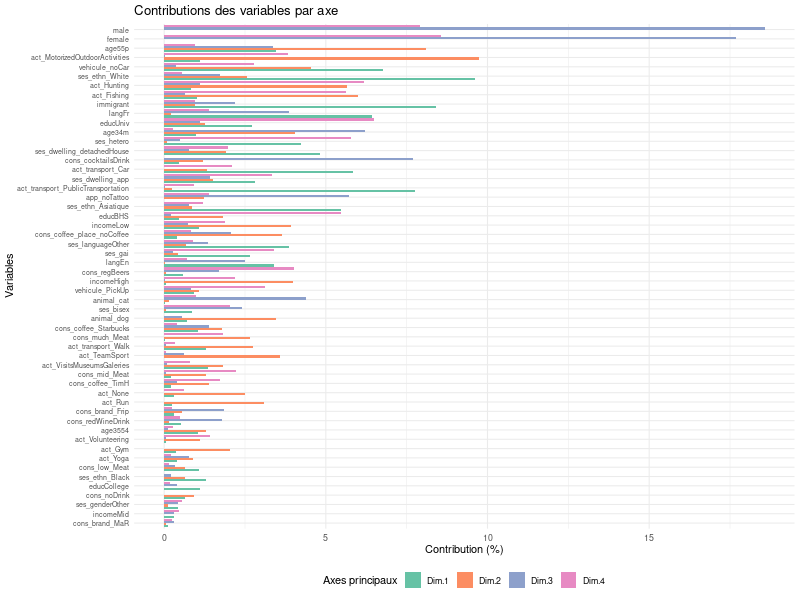

In [5]:
# Graphique contribution des variables
## prep les données
var_contrib <- factoextra::get_pca_var(pca_all)$contrib

### Nombre d'axes principaux à considérer
num_axes <- 4

### Préparer les contributions par axe sans groupement
all_contrib_dodge <- as.data.frame(var_contrib[, 1:num_axes])
all_contrib_dodge$Variable <- rownames(all_contrib_dodge)

### Réorganiser les données pour ggplot2
all_contrib_dodge <- all_contrib_dodge %>%
  pivot_longer(
    cols = starts_with("Dim"),
    names_to = "Axe",
    values_to = "Contribution"
  )

## ggplot
ggplot(all_contrib_dodge, aes(x = reorder(Variable, Contribution), y = Contribution, fill = Axe)) +
  geom_bar(stat = "identity", position = position_dodge()) +
  coord_flip() +
  labs(
    title = "Contributions des variables par axe",
    x = "Variables",
    y = "Contribution (%)"
  ) +
  scale_fill_brewer(palette = "Set2", name = "Axes principaux") +
  theme_minimal() +
  theme(
    legend.position = "bottom",
    axis.text.y = element_text(size = 7)
  )
